### Set up essential libraries for Data Analysis

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

### Import the Excel File into a Pandas DataFrame

In [364]:
df = pd.read_excel('Hyderabad Traffic Monitoring System.xlsx')

df.head()

,Timestamp,Location,Direction,Vehicle_Count,Avg_Speed,Peak_Hour,Weather_Condition,Visibility,Temperature,Humidity,Wind_Speed,Accidents,Roadwork,Traffic_Signal_Status,Congestion_Level,Duplicate_Column,Area
0,2021-01-01 00:00:00,Location_A,South,93,43.794956,True,Foggy,2.574827,33.503269,58.121361,6.712738,1,No,Working,Low,93,Banjara Hills
1,2021-01-01 01:00:00,Location_D,South,3,85.103826,True,Foggy,4.824104,29.303575,22.272571,10.441158,2,No,Not Working,Very High,3,Ameerpet
2,2021-01-01 02:00:00,Location_B,East,98,51.720459,False,Sunny,8.849263,24.816372,60.610620,5.674892,3,Yes,Working,High,98,Begumpet
3,2021-01-01 03:00:00,Location_A,North,42,90.488256,False,Foggy,5.176548,24.389966,73.976233,1.500481,2,No,Working,Very High,42,Nallakunta
4,2021-01-01 04:00:00,Location_D,North,77,66.501830,False,Sunny,7.297831,32.654186,46.335860,14.403852,3,Yes,Not Working,High,77,Kondapur


### Let's dive into data cleanup and transformation

**_Handling duplicate rows_**

In [367]:
duplicates_count = df.duplicated(subset='Timestamp', keep='first').sum()

df.drop_duplicates(subset='Timestamp', keep='first', inplace=True)

print(f"Number of duplicate records in the dataset: {duplicates_count}")

print("\nUPDATED DATASET SAMPLE:\n")
df.head()

Number of duplicate records in the dataset: 10

UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle_Count,Avg_Speed,Peak_Hour,Weather_Condition,Visibility,Temperature,Humidity,Wind_Speed,Accidents,Roadwork,Traffic_Signal_Status,Congestion_Level,Duplicate_Column,Area
0,2021-01-01 00:00:00,Location_A,South,93,43.794956,True,Foggy,2.574827,33.503269,58.121361,6.712738,1,No,Working,Low,93,Banjara Hills
1,2021-01-01 01:00:00,Location_D,South,3,85.103826,True,Foggy,4.824104,29.303575,22.272571,10.441158,2,No,Not Working,Very High,3,Ameerpet
2,2021-01-01 02:00:00,Location_B,East,98,51.720459,False,Sunny,8.849263,24.816372,60.610620,5.674892,3,Yes,Working,High,98,Begumpet
3,2021-01-01 03:00:00,Location_A,North,42,90.488256,False,Foggy,5.176548,24.389966,73.976233,1.500481,2,No,Working,Very High,42,Nallakunta
4,2021-01-01 04:00:00,Location_D,North,77,66.501830,False,Sunny,7.297831,32.654186,46.335860,14.403852,3,Yes,Not Working,High,77,Kondapur


**_Handling null values_**

In [369]:
print(f"Total null values in the dataset: {df.isnull().sum().sum()}")

df.dropna(inplace=True)

print("\nUPDATED DATASET SAMPLE:\n")
df.head()

Total null values in the dataset: 0

UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle_Count,Avg_Speed,Peak_Hour,Weather_Condition,Visibility,Temperature,Humidity,Wind_Speed,Accidents,Roadwork,Traffic_Signal_Status,Congestion_Level,Duplicate_Column,Area
0,2021-01-01 00:00:00,Location_A,South,93,43.794956,True,Foggy,2.574827,33.503269,58.121361,6.712738,1,No,Working,Low,93,Banjara Hills
1,2021-01-01 01:00:00,Location_D,South,3,85.103826,True,Foggy,4.824104,29.303575,22.272571,10.441158,2,No,Not Working,Very High,3,Ameerpet
2,2021-01-01 02:00:00,Location_B,East,98,51.720459,False,Sunny,8.849263,24.816372,60.610620,5.674892,3,Yes,Working,High,98,Begumpet
3,2021-01-01 03:00:00,Location_A,North,42,90.488256,False,Foggy,5.176548,24.389966,73.976233,1.500481,2,No,Working,Very High,42,Nallakunta
4,2021-01-01 04:00:00,Location_D,North,77,66.501830,False,Sunny,7.297831,32.654186,46.335860,14.403852,3,Yes,Not Working,High,77,Kondapur


**_Renaming the columns_**

In [371]:
df.columns = [col.replace('_', ' ') for col in df.columns]

df.rename(columns={
    'Avg Speed': 'Average Speed (in km/h)',
    'Peak Hour': 'Peak Hour?',
    'Visibility': 'Visibility (in km)',
    'Temperature': 'Temperature (in °C)',
    'Humidity': 'Humidity (in %)',
    'Wind Speed': 'Wind Speed (in km/h)', 
    'Roadwork': 'Roadwork?'
}, inplace=True)

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Accidents,Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area
0,2021-01-01 00:00:00,Location_A,South,93,43.794956,True,Foggy,2.574827,33.503269,58.121361,6.712738,1,No,Working,Low,93,Banjara Hills
1,2021-01-01 01:00:00,Location_D,South,3,85.103826,True,Foggy,4.824104,29.303575,22.272571,10.441158,2,No,Not Working,Very High,3,Ameerpet
2,2021-01-01 02:00:00,Location_B,East,98,51.720459,False,Sunny,8.849263,24.816372,60.610620,5.674892,3,Yes,Working,High,98,Begumpet
3,2021-01-01 03:00:00,Location_A,North,42,90.488256,False,Foggy,5.176548,24.389966,73.976233,1.500481,2,No,Working,Very High,42,Nallakunta
4,2021-01-01 04:00:00,Location_D,North,77,66.501830,False,Sunny,7.297831,32.654186,46.335860,14.403852,3,Yes,Not Working,High,77,Kondapur


**_Splitting 'Timestamp' column into 'Date' & 'Time' columns_**

In [373]:
df['Date'] = df['Timestamp'].dt.date

df['Time'] = df['Timestamp'].dt.time

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Accidents,Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area,Date,Time
0,2021-01-01 00:00:00,Location_A,South,93,43.794956,True,Foggy,2.574827,33.503269,58.121361,6.712738,1,No,Working,Low,93,Banjara Hills,2021-01-01,00:00:00
1,2021-01-01 01:00:00,Location_D,South,3,85.103826,True,Foggy,4.824104,29.303575,22.272571,10.441158,2,No,Not Working,Very High,3,Ameerpet,2021-01-01,01:00:00
2,2021-01-01 02:00:00,Location_B,East,98,51.720459,False,Sunny,8.849263,24.816372,60.610620,5.674892,3,Yes,Working,High,98,Begumpet,2021-01-01,02:00:00
3,2021-01-01 03:00:00,Location_A,North,42,90.488256,False,Foggy,5.176548,24.389966,73.976233,1.500481,2,No,Working,Very High,42,Nallakunta,2021-01-01,03:00:00
4,2021-01-01 04:00:00,Location_D,North,77,66.501830,False,Sunny,7.297831,32.654186,46.335860,14.403852,3,Yes,Not Working,High,77,Kondapur,2021-01-01,04:00:00


**_Refining the values of the 'Location' column_**

In [375]:
df['Location'] = df['Location'].str.replace('Location_', '')

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Accidents,Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area,Date,Time
0,2021-01-01 00:00:00,A,South,93,43.794956,True,Foggy,2.574827,33.503269,58.121361,6.712738,1,No,Working,Low,93,Banjara Hills,2021-01-01,00:00:00
1,2021-01-01 01:00:00,D,South,3,85.103826,True,Foggy,4.824104,29.303575,22.272571,10.441158,2,No,Not Working,Very High,3,Ameerpet,2021-01-01,01:00:00
2,2021-01-01 02:00:00,B,East,98,51.720459,False,Sunny,8.849263,24.816372,60.610620,5.674892,3,Yes,Working,High,98,Begumpet,2021-01-01,02:00:00
3,2021-01-01 03:00:00,A,North,42,90.488256,False,Foggy,5.176548,24.389966,73.976233,1.500481,2,No,Working,Very High,42,Nallakunta,2021-01-01,03:00:00
4,2021-01-01 04:00:00,D,North,77,66.501830,False,Sunny,7.297831,32.654186,46.335860,14.403852,3,Yes,Not Working,High,77,Kondapur,2021-01-01,04:00:00


**_Refining the values of 'Average Speed' column_**

In [377]:
df['Average Speed (in km/h)'] = df['Average Speed (in km/h)'].round()

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Accidents,Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area,Date,Time
0,2021-01-01 00:00:00,A,South,93,44.0,True,Foggy,2.574827,33.503269,58.121361,6.712738,1,No,Working,Low,93,Banjara Hills,2021-01-01,00:00:00
1,2021-01-01 01:00:00,D,South,3,85.0,True,Foggy,4.824104,29.303575,22.272571,10.441158,2,No,Not Working,Very High,3,Ameerpet,2021-01-01,01:00:00
2,2021-01-01 02:00:00,B,East,98,52.0,False,Sunny,8.849263,24.816372,60.610620,5.674892,3,Yes,Working,High,98,Begumpet,2021-01-01,02:00:00
3,2021-01-01 03:00:00,A,North,42,90.0,False,Foggy,5.176548,24.389966,73.976233,1.500481,2,No,Working,Very High,42,Nallakunta,2021-01-01,03:00:00
4,2021-01-01 04:00:00,D,North,77,67.0,False,Sunny,7.297831,32.654186,46.335860,14.403852,3,Yes,Not Working,High,77,Kondapur,2021-01-01,04:00:00


**_Refining the values of 'Peak Hour?' column_**

In [379]:
df['Peak Hour?'] = df['Peak Hour?'].replace({True: 'Yes', False: 'No'})

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Accidents,Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area,Date,Time
0,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,2.574827,33.503269,58.121361,6.712738,1,No,Working,Low,93,Banjara Hills,2021-01-01,00:00:00
1,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,4.824104,29.303575,22.272571,10.441158,2,No,Not Working,Very High,3,Ameerpet,2021-01-01,01:00:00
2,2021-01-01 02:00:00,B,East,98,52.0,No,Sunny,8.849263,24.816372,60.610620,5.674892,3,Yes,Working,High,98,Begumpet,2021-01-01,02:00:00
3,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.176548,24.389966,73.976233,1.500481,2,No,Working,Very High,42,Nallakunta,2021-01-01,03:00:00
4,2021-01-01 04:00:00,D,North,77,67.0,No,Sunny,7.297831,32.654186,46.335860,14.403852,3,Yes,Not Working,High,77,Kondapur,2021-01-01,04:00:00


**_Refining the values of 'Weather Condition' column_**

In [381]:
import numpy as np
import datetime

def replace_weather_condition(row):
    time = row['Time']
    
    if isinstance(time, str):
        time = datetime.datetime.strptime(time, '%H:%M:%S').time()
        
    weather = row['Weather Condition']
    weather_conditions = [condition for condition in df['Weather Condition'].unique() if condition != 'Sunny']
    
    if datetime.time(18, 0, 0) <= time <= datetime.time(23, 59, 59) or datetime.time(0, 0, 0) <= time <= datetime.time(8, 0, 0):
        if weather == 'Sunny':
            return np.random.choice(weather_conditions)
    
    return weather

df['Weather Condition'] = df.apply(replace_weather_condition, axis=1)

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Accidents,Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area,Date,Time
0,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,2.574827,33.503269,58.121361,6.712738,1,No,Working,Low,93,Banjara Hills,2021-01-01,00:00:00
1,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,4.824104,29.303575,22.272571,10.441158,2,No,Not Working,Very High,3,Ameerpet,2021-01-01,01:00:00
2,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,8.849263,24.816372,60.610620,5.674892,3,Yes,Working,High,98,Begumpet,2021-01-01,02:00:00
3,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.176548,24.389966,73.976233,1.500481,2,No,Working,Very High,42,Nallakunta,2021-01-01,03:00:00
4,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.297831,32.654186,46.335860,14.403852,3,Yes,Not Working,High,77,Kondapur,2021-01-01,04:00:00


**_Refining the values of 'Visibility' column_**

In [383]:
df['Visibility (in km)'] = df['Visibility (in km)'].round()

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Accidents,Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area,Date,Time
0,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,33.503269,58.121361,6.712738,1,No,Working,Low,93,Banjara Hills,2021-01-01,00:00:00
1,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.303575,22.272571,10.441158,2,No,Not Working,Very High,3,Ameerpet,2021-01-01,01:00:00
2,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,24.816372,60.610620,5.674892,3,Yes,Working,High,98,Begumpet,2021-01-01,02:00:00
3,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.389966,73.976233,1.500481,2,No,Working,Very High,42,Nallakunta,2021-01-01,03:00:00
4,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,32.654186,46.335860,14.403852,3,Yes,Not Working,High,77,Kondapur,2021-01-01,04:00:00


**_Refining the values of 'Temperature' column_**

In [385]:
df['Temperature (in °C)'] = df['Temperature (in °C)'].round()

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Accidents,Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area,Date,Time
0,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.121361,6.712738,1,No,Working,Low,93,Banjara Hills,2021-01-01,00:00:00
1,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.272571,10.441158,2,No,Not Working,Very High,3,Ameerpet,2021-01-01,01:00:00
2,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,60.610620,5.674892,3,Yes,Working,High,98,Begumpet,2021-01-01,02:00:00
3,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,73.976233,1.500481,2,No,Working,Very High,42,Nallakunta,2021-01-01,03:00:00
4,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.335860,14.403852,3,Yes,Not Working,High,77,Kondapur,2021-01-01,04:00:00


**_Refining the values of 'Humidity' column_**

In [387]:
df['Humidity (in %)'] = df['Humidity (in %)'].round()

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Accidents,Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area,Date,Time
0,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,6.712738,1,No,Working,Low,93,Banjara Hills,2021-01-01,00:00:00
1,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,10.441158,2,No,Not Working,Very High,3,Ameerpet,2021-01-01,01:00:00
2,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,5.674892,3,Yes,Working,High,98,Begumpet,2021-01-01,02:00:00
3,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,1.500481,2,No,Working,Very High,42,Nallakunta,2021-01-01,03:00:00
4,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,14.403852,3,Yes,Not Working,High,77,Kondapur,2021-01-01,04:00:00


**_Refining the values of 'Wind Speed' column_**

In [389]:
df['Wind Speed (in km/h)'] = df['Wind Speed (in km/h)'].round()

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Accidents,Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area,Date,Time
0,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,7.0,1,No,Working,Low,93,Banjara Hills,2021-01-01,00:00:00
1,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,10.0,2,No,Not Working,Very High,3,Ameerpet,2021-01-01,01:00:00
2,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,6.0,3,Yes,Working,High,98,Begumpet,2021-01-01,02:00:00
3,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,2.0,2,No,Working,Very High,42,Nallakunta,2021-01-01,03:00:00
4,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,14.0,3,Yes,Not Working,High,77,Kondapur,2021-01-01,04:00:00


**_Modifying the 'Accidents' column_**

In [391]:
def categorize_accidents(accidents):
    if accidents == 0:
        return 'None'
    elif accidents == 1:
        return 'Low'
    elif accidents == 2:
        return 'Moderate'
    elif accidents == 3:
        return 'High'
    else:
        return 'Unknown'

df['Accident Level'] = df['Accidents'].apply(categorize_accidents)

df.drop(columns=['Accidents'], inplace=True)

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area,Date,Time,Accident Level
0,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,7.0,No,Working,Low,93,Banjara Hills,2021-01-01,00:00:00,Low
1,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,10.0,No,Not Working,Very High,3,Ameerpet,2021-01-01,01:00:00,Moderate
2,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,6.0,Yes,Working,High,98,Begumpet,2021-01-01,02:00:00,High
3,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,2.0,No,Working,Very High,42,Nallakunta,2021-01-01,03:00:00,Moderate
4,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,14.0,Yes,Not Working,High,77,Kondapur,2021-01-01,04:00:00,High


**_Refining the values of 'Congestion Level' column_**

In [393]:
def categorize_traffic_volume(vehicle_count):
    if 0 <= vehicle_count <= 15:
        return 'Minimal'
    elif 16 <= vehicle_count <= 35:
        return 'Low'
    elif 36 <= vehicle_count <= 60:
        return 'Moderate'
    elif 61 <= vehicle_count <= 85:
        return 'High'
    elif 86 <= vehicle_count <= 100:
        return 'Extreme'
    else:
        return 'Out of Range'

df['Congestion Level'] = ''

df['Congestion Level'] = df['Vehicle Count'].apply(categorize_traffic_volume)

print("UPDATED DATASET SAMPLE:\n")
df.head()

UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Roadwork?,Traffic Signal Status,Congestion Level,Duplicate Column,Area,Date,Time,Accident Level
0,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,7.0,No,Working,Extreme,93,Banjara Hills,2021-01-01,00:00:00,Low
1,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,10.0,No,Not Working,Minimal,3,Ameerpet,2021-01-01,01:00:00,Moderate
2,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,6.0,Yes,Working,Extreme,98,Begumpet,2021-01-01,02:00:00,High
3,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,2.0,No,Working,Moderate,42,Nallakunta,2021-01-01,03:00:00,Moderate
4,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,14.0,Yes,Not Working,High,77,Kondapur,2021-01-01,04:00:00,High


**_Removing the column 'Duplicate Column' from the dataset_**

In [395]:
df.drop('Duplicate Column', axis=1, inplace=True)

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Roadwork?,Traffic Signal Status,Congestion Level,Area,Date,Time,Accident Level
0,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,7.0,No,Working,Extreme,Banjara Hills,2021-01-01,00:00:00,Low
1,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,10.0,No,Not Working,Minimal,Ameerpet,2021-01-01,01:00:00,Moderate
2,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,6.0,Yes,Working,Extreme,Begumpet,2021-01-01,02:00:00,High
3,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,2.0,No,Working,Moderate,Nallakunta,2021-01-01,03:00:00,Moderate
4,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,14.0,Yes,Not Working,High,Kondapur,2021-01-01,04:00:00,High


**_Added two dummy rows to the dataset for enhanced analysis_**

In [397]:
new_rows = pd.DataFrame({
    'Timestamp': ['2021-01-03 22:00:00', '2021-01-03 23:00:00'],
    'Date': ['2021-01-03', '2021-01-03'],
    'Time': ['22:00:00', '23:00:00'],
    'Location': ['B', 'B'],
    'Direction': ['North', 'South'],
    'Vehicle Count': [48, 54],
    'Average Speed (in km/h)': [64, 55],
    'Peak Hour?': ['No', 'Yes'],
    'Weather Condition': ['Cloudy', 'Foggy'],
    'Visibility (in km)': [8.0, 5.0],
    'Temperature (in °C)': [30.0, 28.0],
    'Humidity (in %)': [65, 72],
    'Wind Speed (in km/h)': [10.0, 12.0],
    'Accident Level': ['Low', 'High'],
    'Roadwork?': ['No', 'Yes'],
    'Traffic Signal Status': ['Working', 'Not Working'],
    'Congestion Level': ['Medium', 'High'],
    'Area': ['Jubilee Hills', 'Banjara Hills']
})

df = pd.concat([df, new_rows], ignore_index=True)

print("\nUPDATED DATASET:\n")
df


UPDATED DATASET:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Roadwork?,Traffic Signal Status,Congestion Level,Area,Date,Time,Accident Level
0,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,7.0,No,Working,Extreme,Banjara Hills,2021-01-01,00:00:00,Low
1,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,10.0,No,Not Working,Minimal,Ameerpet,2021-01-01,01:00:00,Moderate
2,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,6.0,Yes,Working,Extreme,Begumpet,2021-01-01,02:00:00,High
3,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,2.0,No,Working,Moderate,Nallakunta,2021-01-01,03:00:00,Moderate
4,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,14.0,Yes,Not Working,High,Kondapur,2021-01-01,04:00:00,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-01-03 19:00:00,A,North,4,33.0,No,Rainy,9.0,25.0,70.0,0.0,No,Working,Minimal,Ameerpet,2021-01-03,19:00:00,High
68,2021-01-03 20:00:00,A,East,67,70.0,Yes,Windy,2.0,25.0,63.0,14.0,No,Not Working,High,Begumpet,2021-01-03,20:00:00,High
69,2021-01-03 21:00:00,A,North,11,66.0,Yes,Rainy,8.0,28.0,67.0,8.0,No,Working,Minimal,Gachibowli,2021-01-03,21:00:00,Moderate
70,2021-01-03 22:00:00,B,North,48,64.0,No,Cloudy,8.0,30.0,65.0,10.0,No,Working,Medium,Jubilee Hills,2021-01-03,22:00:00,Low


**_Adding custom index to the dataset_**

In [399]:
traffic_update_id = [f'TUPD{i+1:03d}' for i in range(len(df))]

df['Traffic Update ID'] = traffic_update_id

df.set_index('Traffic Update ID', inplace=True)

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Roadwork?,Traffic Signal Status,Congestion Level,Area,Date,Time,Accident Level
Traffic Update ID,,,,,,,,,,,,,,,,,,
TUPD001,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,7.0,No,Working,Extreme,Banjara Hills,2021-01-01,00:00:00,Low
TUPD002,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,10.0,No,Not Working,Minimal,Ameerpet,2021-01-01,01:00:00,Moderate
TUPD003,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,6.0,Yes,Working,Extreme,Begumpet,2021-01-01,02:00:00,High
TUPD004,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,2.0,No,Working,Moderate,Nallakunta,2021-01-01,03:00:00,Moderate
TUPD005,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,14.0,Yes,Not Working,High,Kondapur,2021-01-01,04:00:00,High


**_Adding a new column 'Speed Level'_**

In [401]:
def categorize_average_speed(speed):
    if 0 <= speed <= 20:
        return 'Minimal'
    elif 21 <= speed <= 40:
        return 'Low'
    elif 41 <= speed <= 60:
        return 'Moderate'
    elif 61 <= speed <= 80:
        return 'High'
    elif 81 <= speed <= 100:
        return 'Extreme'
    else:
        return 'Out of Range'

df['Speed Level'] = df['Average Speed (in km/h)'].apply(categorize_average_speed)

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Roadwork?,Traffic Signal Status,Congestion Level,Area,Date,Time,Accident Level,Speed Level
Traffic Update ID,,,,,,,,,,,,,,,,,,,
TUPD001,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,7.0,No,Working,Extreme,Banjara Hills,2021-01-01,00:00:00,Low,Moderate
TUPD002,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,10.0,No,Not Working,Minimal,Ameerpet,2021-01-01,01:00:00,Moderate,Extreme
TUPD003,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,6.0,Yes,Working,Extreme,Begumpet,2021-01-01,02:00:00,High,Moderate
TUPD004,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,2.0,No,Working,Moderate,Nallakunta,2021-01-01,03:00:00,Moderate,Extreme
TUPD005,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,14.0,Yes,Not Working,High,Kondapur,2021-01-01,04:00:00,High,High


**_Adding a new column 'Visibility Level'_**

In [403]:
def categorize_visibility(visibility):
    if 0 <= visibility <= 3:
        return 'Low'
    elif 4 <= visibility <= 7:
        return 'Moderate'
    elif 8 <= visibility <= 10:
        return 'High'
    else:
        return 'Out of Range'

df['Visibility Level'] = df['Visibility (in km)'].apply(categorize_visibility)

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),Wind Speed (in km/h),Roadwork?,Traffic Signal Status,Congestion Level,Area,Date,Time,Accident Level,Speed Level,Visibility Level
Traffic Update ID,,,,,,,,,,,,,,,,,,,,
TUPD001,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,7.0,No,Working,Extreme,Banjara Hills,2021-01-01,00:00:00,Low,Moderate,Low
TUPD002,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,10.0,No,Not Working,Minimal,Ameerpet,2021-01-01,01:00:00,Moderate,Extreme,Moderate
TUPD003,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,6.0,Yes,Working,Extreme,Begumpet,2021-01-01,02:00:00,High,Moderate,High
TUPD004,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,2.0,No,Working,Moderate,Nallakunta,2021-01-01,03:00:00,Moderate,Extreme,Moderate
TUPD005,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,14.0,Yes,Not Working,High,Kondapur,2021-01-01,04:00:00,High,High,Moderate


**_Adding a new column 'Temperature Level'_**

In [405]:
def categorize_temperature(temp):
    if 15 <= temp <= 22:
        return 'Cool'
    elif 23 <= temp <= 28:
        return 'Moderate'
    elif 29 <= temp <= 34:
        return 'Warm'
    else:
        return 'Warm'

df['Temperature Level'] = df['Temperature (in °C)'].apply(categorize_temperature)

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),...,Roadwork?,Traffic Signal Status,Congestion Level,Area,Date,Time,Accident Level,Speed Level,Visibility Level,Temperature Level
Traffic Update ID,,,,,,,,,,,,,,,,,,,,,
TUPD001,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,...,No,Working,Extreme,Banjara Hills,2021-01-01,00:00:00,Low,Moderate,Low,Warm
TUPD002,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,...,No,Not Working,Minimal,Ameerpet,2021-01-01,01:00:00,Moderate,Extreme,Moderate,Warm
TUPD003,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,...,Yes,Working,Extreme,Begumpet,2021-01-01,02:00:00,High,Moderate,High,Moderate
TUPD004,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,...,No,Working,Moderate,Nallakunta,2021-01-01,03:00:00,Moderate,Extreme,Moderate,Moderate
TUPD005,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,...,Yes,Not Working,High,Kondapur,2021-01-01,04:00:00,High,High,Moderate,Warm


**_Adding a new column 'Humidity Level'_**

In [407]:
def categorize_humidity(humidity):
    if 20 <= humidity <= 40:
        return 'Low'
    elif 41 <= humidity <= 60:
        return 'Moderate'
    elif 61 <= humidity <= 90:
        return 'High'
    else:
        return 'Out of Range'

df['Humidity Level'] = df['Humidity (in %)'].apply(categorize_humidity)

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),...,Traffic Signal Status,Congestion Level,Area,Date,Time,Accident Level,Speed Level,Visibility Level,Temperature Level,Humidity Level
Traffic Update ID,,,,,,,,,,,,,,,,,,,,,
TUPD001,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,...,Working,Extreme,Banjara Hills,2021-01-01,00:00:00,Low,Moderate,Low,Warm,Moderate
TUPD002,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,...,Not Working,Minimal,Ameerpet,2021-01-01,01:00:00,Moderate,Extreme,Moderate,Warm,Low
TUPD003,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,...,Working,Extreme,Begumpet,2021-01-01,02:00:00,High,Moderate,High,Moderate,High
TUPD004,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,...,Working,Moderate,Nallakunta,2021-01-01,03:00:00,Moderate,Extreme,Moderate,Moderate,High
TUPD005,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,...,Not Working,High,Kondapur,2021-01-01,04:00:00,High,High,Moderate,Warm,Moderate


**_Adding a new column 'Wind Speed Level'_**

In [409]:
def categorize_wind_speed(speed):
    if 0 <= speed <= 5:
        return 'Light'
    elif 6 <= speed <= 10:
        return 'Moderate'
    elif 11 <= speed <= 15:
        return 'Strong'
    else:
        return 'Out of Range'

df['Wind Speed Level'] = df['Wind Speed (in km/h)'].apply(categorize_wind_speed)

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


UPDATED DATASET SAMPLE:



,Timestamp,Location,Direction,Vehicle Count,Average Speed (in km/h),Peak Hour?,Weather Condition,Visibility (in km),Temperature (in °C),Humidity (in %),...,Congestion Level,Area,Date,Time,Accident Level,Speed Level,Visibility Level,Temperature Level,Humidity Level,Wind Speed Level
Traffic Update ID,,,,,,,,,,,,,,,,,,,,,
TUPD001,2021-01-01 00:00:00,A,South,93,44.0,Yes,Foggy,3.0,34.0,58.0,...,Extreme,Banjara Hills,2021-01-01,00:00:00,Low,Moderate,Low,Warm,Moderate,Moderate
TUPD002,2021-01-01 01:00:00,D,South,3,85.0,Yes,Foggy,5.0,29.0,22.0,...,Minimal,Ameerpet,2021-01-01,01:00:00,Moderate,Extreme,Moderate,Warm,Low,Moderate
TUPD003,2021-01-01 02:00:00,B,East,98,52.0,No,Windy,9.0,25.0,61.0,...,Extreme,Begumpet,2021-01-01,02:00:00,High,Moderate,High,Moderate,High,Moderate
TUPD004,2021-01-01 03:00:00,A,North,42,90.0,No,Foggy,5.0,24.0,74.0,...,Moderate,Nallakunta,2021-01-01,03:00:00,Moderate,Extreme,Moderate,Moderate,High,Light
TUPD005,2021-01-01 04:00:00,D,North,77,67.0,No,Rainy,7.0,33.0,46.0,...,High,Kondapur,2021-01-01,04:00:00,High,High,Moderate,Warm,Moderate,Strong


**_Making final modifications to the dataset_**

In [411]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.sort_values(by='Timestamp', ascending=True, inplace=True)

column_order = [
    'Timestamp', 'Date', 'Time', 'Area', 'Location', 'Direction', 
    'Vehicle Count', 'Congestion Level', 'Average Speed (in km/h)', 
    'Speed Level', 'Peak Hour?', 'Weather Condition', 'Visibility (in km)', 
    'Visibility Level', 'Temperature (in °C)', 'Temperature Level', 'Humidity (in %)', 
    'Humidity Level', 'Wind Speed (in km/h)', 'Wind Speed Level', 
    'Roadwork?', 'Traffic Signal Status', 'Accident Level'
]

df = df[column_order]

print("\nCOLUMN & DATATYPE DETAILS:\n")
df.info()

print("\nUPDATED DATASET SAMPLE:\n")
df.head()


COLUMN & DATATYPE DETAILS:

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, TUPD001 to TUPD072
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                72 non-null     datetime64[ns]
 1   Date                     72 non-null     object        
 2   Time                     72 non-null     object        
 3   Area                     72 non-null     object        
 4   Location                 72 non-null     object        
 5   Direction                72 non-null     object        
 6   Vehicle Count            72 non-null     int64         
 7   Congestion Level         72 non-null     object        
 8   Average Speed (in km/h)  72 non-null     float64       
 9   Speed Level              72 non-null     object        
 10  Peak Hour?               72 non-null     object        
 11  Weather Condition        72 non-null     object        
 12  Vis

,Timestamp,Date,Time,Area,Location,Direction,Vehicle Count,Congestion Level,Average Speed (in km/h),Speed Level,...,Visibility Level,Temperature (in °C),Temperature Level,Humidity (in %),Humidity Level,Wind Speed (in km/h),Wind Speed Level,Roadwork?,Traffic Signal Status,Accident Level
Traffic Update ID,,,,,,,,,,,,,,,,,,,,,
TUPD001,2021-01-01 00:00:00,2021-01-01,00:00:00,Banjara Hills,A,South,93,Extreme,44.0,Moderate,...,Low,34.0,Warm,58.0,Moderate,7.0,Moderate,No,Working,Low
TUPD002,2021-01-01 01:00:00,2021-01-01,01:00:00,Ameerpet,D,South,3,Minimal,85.0,Extreme,...,Moderate,29.0,Warm,22.0,Low,10.0,Moderate,No,Not Working,Moderate
TUPD003,2021-01-01 02:00:00,2021-01-01,02:00:00,Begumpet,B,East,98,Extreme,52.0,Moderate,...,High,25.0,Moderate,61.0,High,6.0,Moderate,Yes,Working,High
TUPD004,2021-01-01 03:00:00,2021-01-01,03:00:00,Nallakunta,A,North,42,Moderate,90.0,Extreme,...,Moderate,24.0,Moderate,74.0,High,2.0,Light,No,Working,Moderate
TUPD005,2021-01-01 04:00:00,2021-01-01,04:00:00,Kondapur,D,North,77,High,67.0,High,...,Moderate,33.0,Warm,46.0,Moderate,14.0,Strong,Yes,Not Working,High


**_Saving the DataFrame to a new Excel file_**

In [413]:
df.to_csv('Hyderabad Traffic Monitoring System_Updated.csv', index=True)

### Let's get started with statistical analysis and visualistions on the dataset

**_Comparing Traffic Volumes Across Different Locations_**

+ __Statistical Analysis__

In [417]:
from scipy.stats import levene, f_oneway, kruskal

locations = df['Area'].unique()
volume_groups = [df[df['Area'] == loc]['Vehicle Count'] for loc in locations]

levene_result = levene(*volume_groups)
print("LEVENE'S TEST FOR HOMOGENEITY OF VARIANCES")
print(f"P-value: {levene_result.pvalue:.4f}")
print("Conclusion: Levene's Test confirms equal variances across groups. ANOVA assumptions are satisfied.\n")

anova_result = f_oneway(*volume_groups)
print("ANOVA FOR TRAFFIC VOLUME ACROSS LOCATIONS")
print(f"P-value: {anova_result.pvalue:.4f}")
if anova_result.pvalue < 0.05:
    print("Conclusion: ANOVA indicates significant variation in average speed across areas. Let's perform the Kruskal-Wallis test.")
    kruskal_result = kruskal(*volume_groups)
    print("\nKRUSKAL-WALLIS TEST")
    print(f"P-value: {kruskal_result.pvalue:.4f}")
    if kruskal_result.pvalue < 0.05:
        print("Conclusion: Kruskal-Wallis test indicates significant variation in traffic volume across areas (non-parametric).")
    else:
        print("Conclusion: Kruskal-Wallis test indicates no significant variation in traffic volume across areas (non-parametric).")
else:
    print("Conclusion: ANOVA indicates no significant variation in traffic volume across areas. Traffic volume is consistent across areas.\n")
    print("KRUSKAL-WALLIS TEST")
    print("Conclusion: Not performed as ANOVA results are reliable and do not show significant variation.")

LEVENE'S TEST FOR HOMOGENEITY OF VARIANCES
P-value: 0.2563
Conclusion: Levene's Test confirms equal variances across groups. ANOVA assumptions are satisfied.

ANOVA FOR TRAFFIC VOLUME ACROSS LOCATIONS
P-value: 0.3462
Conclusion: ANOVA indicates no significant variation in traffic volume across areas. Traffic volume is consistent across areas.

KRUSKAL-WALLIS TEST
Conclusion: Not performed as ANOVA results are reliable and do not show significant variation.


+ __Visualization__

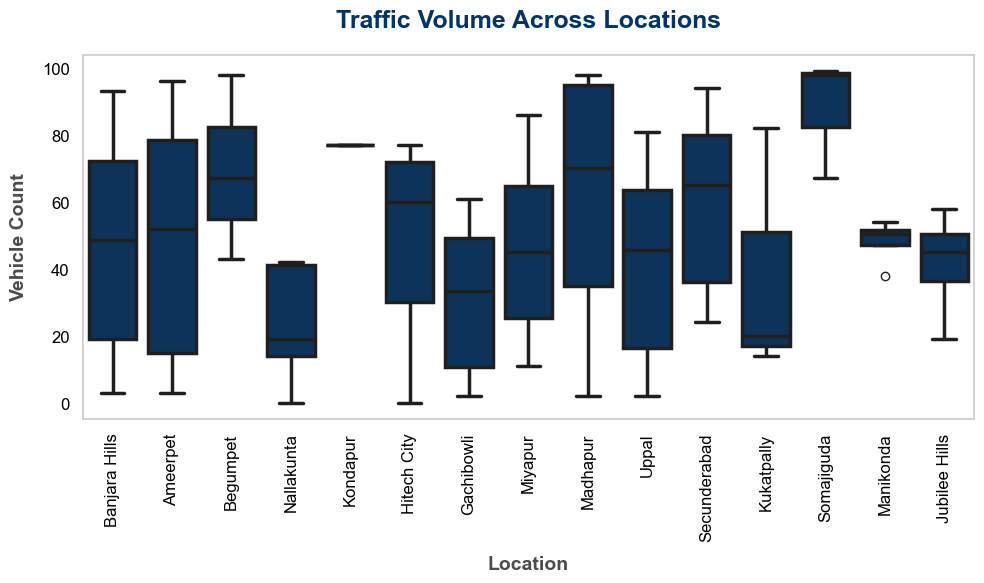

In [419]:
sns.set_theme(style="whitegrid")

plot_color = '#003366'
title_color = '#4B4B4B'

plt.figure(figsize=(10, 6))

sns.boxplot(x='Area', y='Vehicle Count', data=df, color=plot_color, linewidth=2.5)

plt.title('Traffic Volume Across Locations', fontsize=18, color=plot_color, weight='bold', pad=20)
plt.xlabel('Location', fontsize=14, color=title_color, weight='bold', labelpad=10)
plt.ylabel('Vehicle Count', fontsize=14, color=title_color, weight='bold', labelpad=10)

plt.xticks(rotation=90, fontsize=12, color='black', weight='medium')
plt.yticks(fontsize=12, color='black', weight='medium')

plt.grid(False)

plt.tight_layout()
plt.show()

**_Comparing Average Speed Across Different Locations_**

+ __Statistical Analysis__

In [422]:
from scipy.stats import levene, f_oneway, kruskal

locations = df['Area'].unique()
speed_groups = [df[df['Area'] == loc]['Average Speed (in km/h)'] for loc in locations]

levene_result = levene(*speed_groups)
print("LEVENE'S TEST FOR HOMOGENEITY OF VARIANCES")
print(f"P-value: {levene_result.pvalue:.4f}")
if levene_result.pvalue < 0.05:
    print("Conclusion: Levene's Test indicates unequal variances across groups. ANOVA assumptions may not be satisfied.\n")
else:
    print("Conclusion: Levene's Test confirms equal variances across groups. ANOVA assumptions are satisfied.\n")

anova_result = f_oneway(*speed_groups)
print("ANOVA FOR AVERAGE SPEED ACROSS LOCATIONS")
print(f"P-value: {anova_result.pvalue:.4f}")
if anova_result.pvalue < 0.05:
    print("Conclusion: ANOVA indicates significant variation in average speed across areas. Let's perform the Kruskal-Wallis test.")
    
    kruskal_result = kruskal(*speed_groups)
    print("\nKRUSKAL-WALLIS TEST")
    print(f"P-value: {kruskal_result.pvalue:.4f}")
    if kruskal_result.pvalue < 0.05:
        print("Conclusion: Kruskal-Wallis Test indicates significant variation in average speed across areas (non-parametric).")
    else:
        print("Conclusion: Kruskal-Wallis Test indicates no significant variation in average speed across areas (non-parametric).")
else:
    print("Conclusion: ANOVA indicates no significant variation in average speed across areas. Average speed is consistent across areas.\n")
    print("KRUSKAL-WALLIS TEST")
    print("Conclusion: Not performed as ANOVA results are reliable and do not show significant variation.")

LEVENE'S TEST FOR HOMOGENEITY OF VARIANCES
P-value: 0.6057
Conclusion: Levene's Test confirms equal variances across groups. ANOVA assumptions are satisfied.

ANOVA FOR AVERAGE SPEED ACROSS LOCATIONS
P-value: 0.4014
Conclusion: ANOVA indicates no significant variation in average speed across areas. Average speed is consistent across areas.

KRUSKAL-WALLIS TEST
Conclusion: Not performed as ANOVA results are reliable and do not show significant variation.


+ __Visualization__

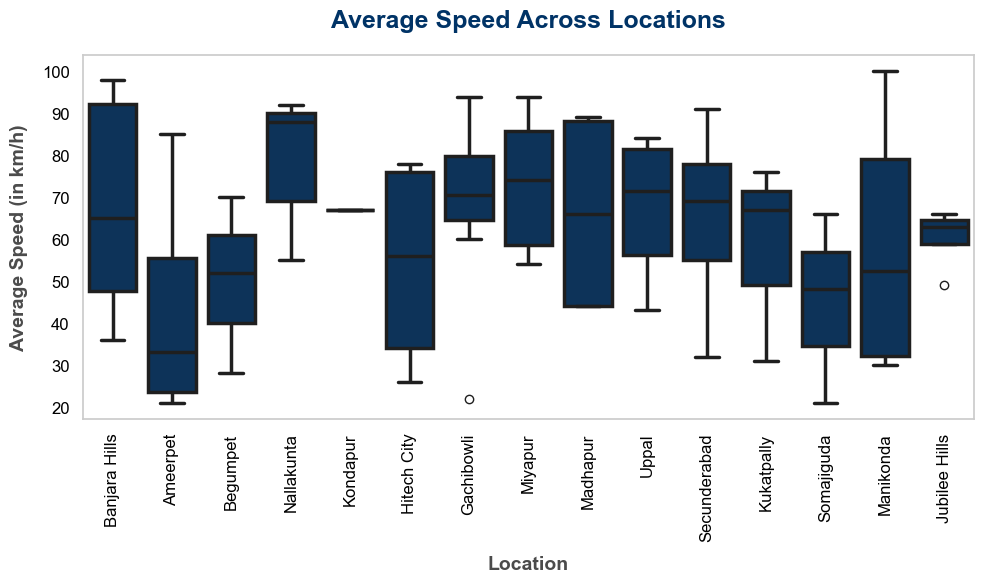

In [424]:
plot_color = '#003366'
title_color = '#4B4B4B'

plt.figure(figsize=(10, 6))

sns.boxplot(x='Area', y='Average Speed (in km/h)', data=df, color=plot_color, linewidth=2.5)

plt.title('Average Speed Across Locations', fontsize=18, color=plot_color, weight='bold', pad=20)
plt.xlabel('Location', fontsize=14, color=title_color, weight='bold', labelpad=10)
plt.ylabel('Average Speed (in km/h)', fontsize=14, color=title_color, weight='bold', labelpad=10)

plt.xticks(rotation=90, fontsize=12, color='black', weight='medium')
plt.yticks(fontsize=12, color='black', weight='medium')

plt.grid(False)

plt.tight_layout()
plt.show()

**_Association Between Traffic Volume and Average Speed_**

+ __Statistical Analysis__

In [427]:
from scipy.stats import pearsonr, spearmanr

traffic_volume = df['Vehicle Count']
average_speed = df['Average Speed (in km/h)']

pearson_corr, pearson_pvalue = pearsonr(traffic_volume, average_speed)
print("PEARSON CORRELATION COEFFICIENT")
print(f"Correlation Coefficient: {pearson_corr:.4f}")
print(f"P-value: {pearson_pvalue:.4f}")
if pearson_pvalue < 0.05:
    print("Conclusion: Pearson Correlation indicates a significant linear relationship between traffic volume and average speed.")
else:
    print("Conclusion: Pearson Correlation indicates no significant linear relationship between traffic volume and average speed.\n")

spearman_corr, spearman_pvalue = spearmanr(traffic_volume, average_speed)
print("\nSPEARMAN RANK CORRELATION")
print(f"Correlation Coefficient: {spearman_corr:.4f}")
print(f"P-value: {spearman_pvalue:.4f}")
if spearman_pvalue < 0.05:
    print("Conclusion: Spearman Rank Correlation indicates a significant monotonic relationship between traffic volume and average speed.")
else:
    print("Conclusion: Spearman Rank Correlation indicates no significant monotonic relationship between traffic volume and average speed.")

PEARSON CORRELATION COEFFICIENT
Correlation Coefficient: -0.2970
P-value: 0.0113
Conclusion: Pearson Correlation indicates a significant linear relationship between traffic volume and average speed.

SPEARMAN RANK CORRELATION
Correlation Coefficient: -0.3077
P-value: 0.0086
Conclusion: Spearman Rank Correlation indicates a significant monotonic relationship between traffic volume and average speed.


+ __Visualization__

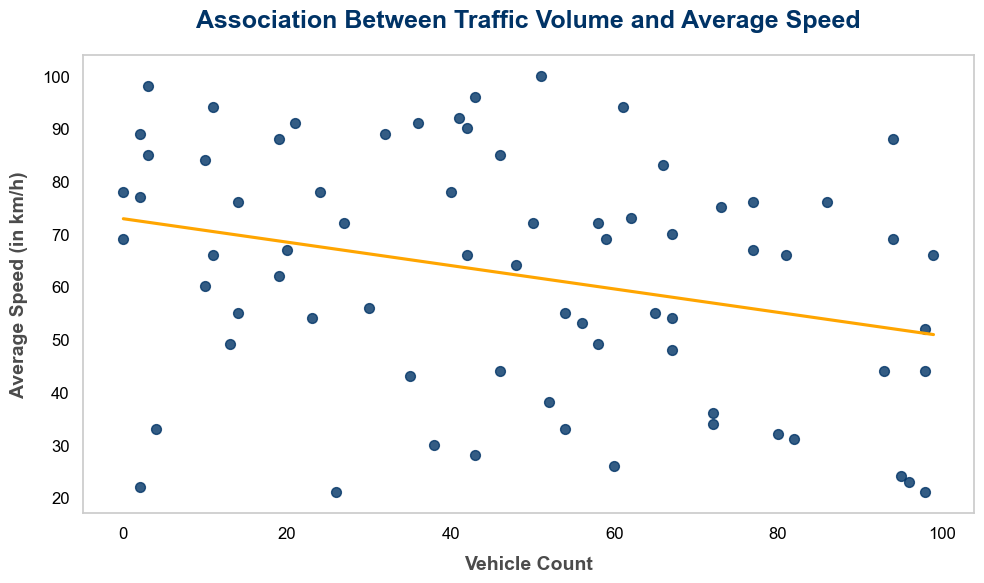

In [429]:
plot_color = '#003366'
title_color = '#4B4B4B'

plt.figure(figsize=(10, 6))

sns.regplot(x='Vehicle Count', y='Average Speed (in km/h)', data=df, scatter_kws={'color': plot_color, 's': 50}, line_kws={'color': 'orange'}, ci=None)

plt.title('Association Between Traffic Volume and Average Speed', fontsize=18, color=plot_color, weight='bold', pad=20)
plt.xlabel('Vehicle Count', fontsize=14, color=title_color, weight='bold', labelpad=10)
plt.ylabel('Average Speed (in km/h)', fontsize=14, color=title_color, weight='bold', labelpad=10)

plt.xticks(fontsize=12, color='black', weight='medium')
plt.yticks(fontsize=12, color='black', weight='medium')

plt.grid(False)

plt.tight_layout()
plt.show()

**_Categorical Analysis of Congestion Levels Across Areas_**

+ __Statistical Analysis__

In [432]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Congestion Level'], df['Area'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("CHI-SQUARE TEST OF INDEPENDENCE")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

if p_value < 0.05:
    print("Conclusion: Chi-Square Test indicates a significant association between traffic congestion levels and areas.")
else:
    print("Conclusion: Chi-Square Test indicates no significant association between traffic congestion levels and areas.")

CHI-SQUARE TEST OF INDEPENDENCE
Chi2 Statistic: 69.2330
P-value: 0.5034
Degrees of Freedom: 70
Conclusion: Chi-Square Test indicates no significant association between traffic congestion levels and areas.


+ __Visualization__

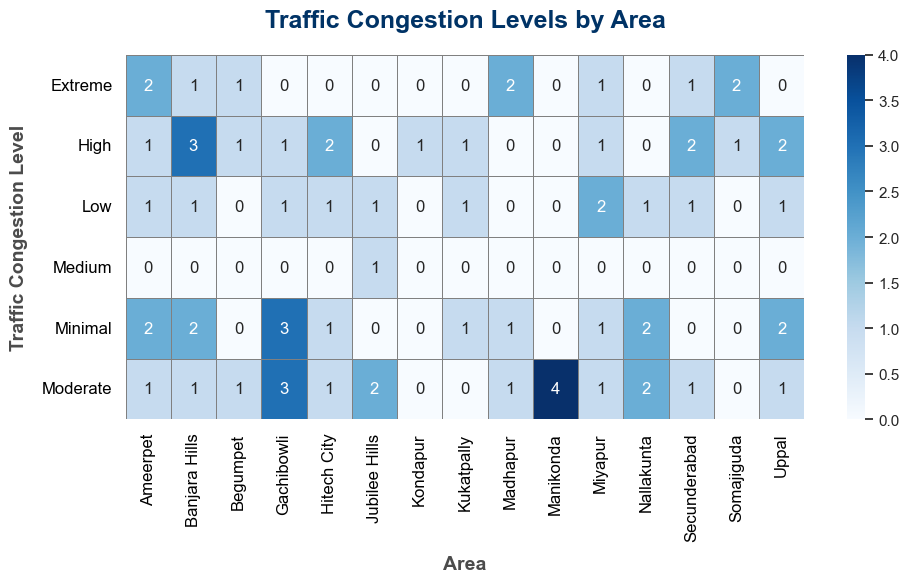

In [434]:
contingency_table = pd.crosstab(df['Congestion Level'], df['Area'])

plot_color = '#003366'
title_color = '#4B4B4B'

plt.figure(figsize=(10, 6))

sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', linewidths=0.5, linecolor='gray')

plt.title('Traffic Congestion Levels by Area', fontsize=18, color=plot_color, weight='bold', pad=20)
plt.xlabel('Area', fontsize=14, color=title_color, weight='bold', labelpad=10)
plt.ylabel('Traffic Congestion Level', fontsize=14, color=title_color, weight='bold', labelpad=10)

plt.xticks(rotation=90, fontsize=12, color='black', weight='medium')
plt.yticks(rotation=0, fontsize=12, color='black', weight='medium')

plt.tight_layout()
plt.show()

**_Categorical Analysis of Speed Levels Across Areas_**

+ __Statistical Analysis__

In [437]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Speed Level'], df['Area'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("CHI-SQUARE TEST OF INDEPENDENCE")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

if p_value < 0.05:
    print("Conclusion: Chi-Square Test indicates a significant association between traffic speed levels and areas.")
else:
    print("Conclusion: Chi-Square Test indicates no significant association between traffic speed levels and areas.")

CHI-SQUARE TEST OF INDEPENDENCE
Chi2 Statistic: 43.2956
P-value: 0.4158
Degrees of Freedom: 42
Conclusion: Chi-Square Test indicates no significant association between traffic speed levels and areas.


+ __Visualization__

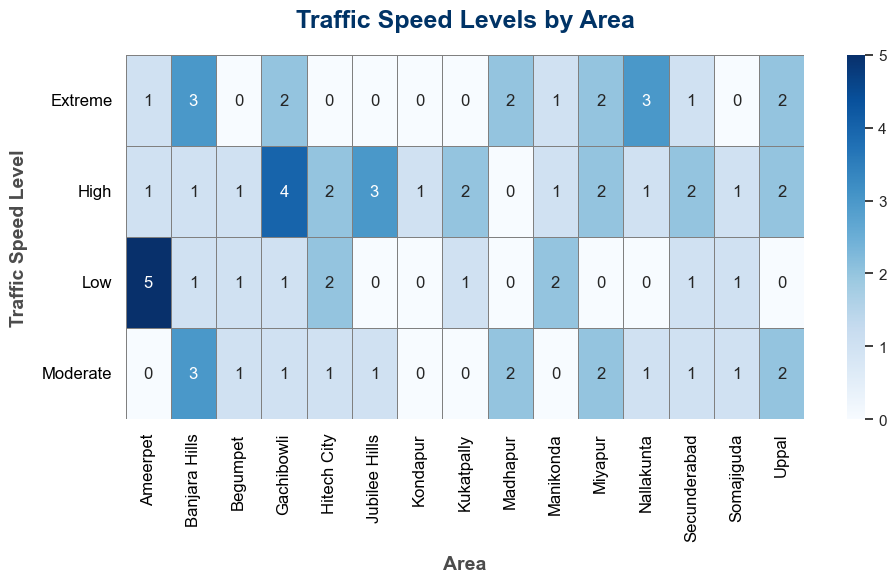

In [439]:
contingency_table = pd.crosstab(df['Speed Level'], df['Area'])

plot_color = '#003366'
title_color = '#4B4B4B'

plt.figure(figsize=(10, 6))

sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', linewidths=0.5, linecolor='gray')

plt.title('Traffic Speed Levels by Area', fontsize=18, color=plot_color, weight='bold', pad=20)
plt.xlabel('Area', fontsize=14, color=title_color, weight='bold', labelpad=10)
plt.ylabel('Traffic Speed Level', fontsize=14, color=title_color, weight='bold', labelpad=10)

plt.xticks(rotation=90, fontsize=12, color='black', weight='medium')
plt.yticks(rotation=0, fontsize=12, color='black', weight='medium')

plt.tight_layout()
plt.show()

**_Comparing Traffic Volume Between Peak and Non-Peak Hours_**

+ __Statistical Analysis__

In [442]:
from scipy.stats import ttest_ind, f_oneway, kruskal
import pandas as pd

# Define time periods and separate the data into groups
time_periods = df['Peak Hour?'].unique()
volume_groups = [df[df['Peak Hour?'] == period]['Vehicle Count'] for period in time_periods]

# Statistical Analysis
if len(time_periods) == 2:
    # T-Test for comparing two time periods
    ttest_result = ttest_ind(volume_groups[0], volume_groups[1])
    print("T-TEST FOR TIME-BASED VARIATIONS IN TRAFFIC VOLUME")
    print(f"P-value: {ttest_result.pvalue:.4f}")
    if ttest_result.pvalue < 0.05:
        print("Conclusion: T-Test indicates significant variation in traffic volume with respect to the peak hours.")
    else:
        print("Conclusion: T-Test indicates no significant variation in traffic volume with respect to the peak hours.\n")

elif len(time_periods) > 2:
    # ANOVA for more than two time periods
    anova_result = f_oneway(*volume_groups)
    print("ANOVA FOR TIME-BASED VARIATIONS IN TRAFFIC VOLUME")
    print(f"P-value: {anova_result.pvalue:.4f}")
    if anova_result.pvalue < 0.05:
        print("Conclusion: ANOVA indicates significant variation in traffic volume with respect to the peak hours. Let's perform the Kruskal-Wallis test.")
        kruskal_result = kruskal(*volume_groups)
        print("\nKRUSKAL-WALLIS TEST")
        print(f"P-value: {kruskal_result.pvalue:.4f}")
        if kruskal_result.pvalue < 0.05:
            print("Conclusion: Kruskal-Wallis Test indicates significant variation in traffic volume with respect to the peak hours (non-parametric).")
        else:
            print("Conclusion: Kruskal-Wallis Test indicates no significant variation in traffic volume with respect to the peak hours (non-parametric).")
    else:
        print("Conclusion: ANOVA indicates no significant variation in traffic volume with respect to the peak hours. Traffic volume is consistent regardless.\n")
        print("KRUSKAL-WALLIS TEST")
        print("Conclusion: Not performed as ANOVA results are reliable and do not show significant variation.")
else:
    print("Error: Not enough time periods for statistical analysis.")

T-TEST FOR TIME-BASED VARIATIONS IN TRAFFIC VOLUME
P-value: 0.8666
Conclusion: T-Test indicates no significant variation in traffic volume with respect to the peak hours.



+ __Visualization__

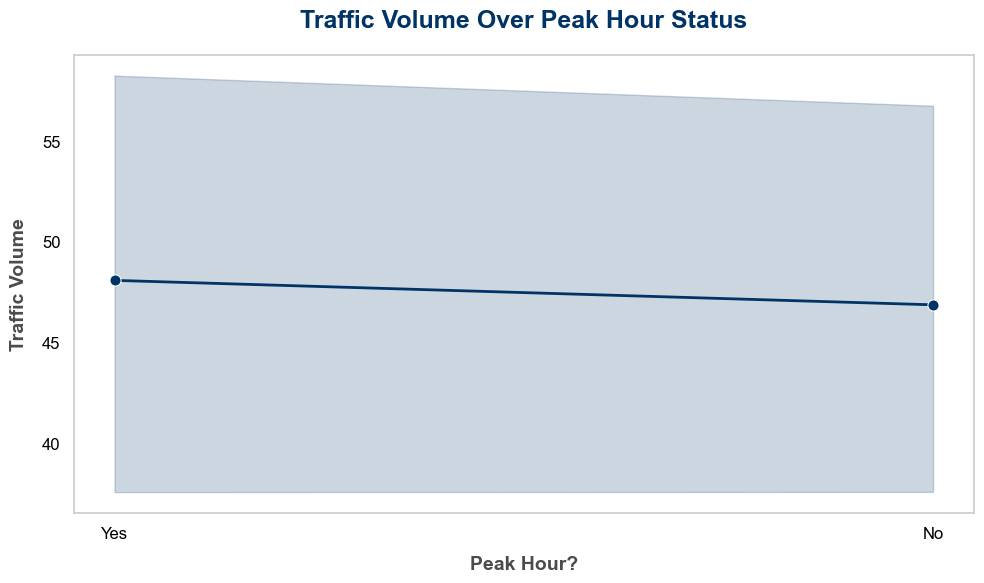

In [444]:
plot_color = '#003366'
line_color = '#003366'
title_color = '#4B4B4B'
marker_color = '#003366'

plt.figure(figsize=(10, 6))

sns.lineplot(x='Peak Hour?', y='Vehicle Count', data=df, color=line_color, linewidth=2, marker='o', markersize=8, markerfacecolor=marker_color)

plt.title('Traffic Volume Over Peak Hour Status', fontsize=18, color=plot_color, weight='bold', pad=20)
plt.xlabel('Peak Hour?', fontsize=14, color=title_color, weight='bold', labelpad=10)
plt.ylabel('Traffic Volume', fontsize=14, color=title_color, weight='bold', labelpad=10)

plt.xticks(rotation=0, fontsize=12, color='black', weight='medium')
plt.yticks(fontsize=12, color='black', weight='medium')

plt.grid(False)

plt.tight_layout()
plt.show()

**_Comparing Average Speed Between Peak and Non-Peak Hours_**

+ __Statistical Analysis__

In [447]:
from scipy.stats import ttest_ind, f_oneway, kruskal
import pandas as pd

time_periods = df['Peak Hour?'].unique()
volume_groups = [df[df['Peak Hour?'] == period]['Average Speed (in km/h)'] for period in time_periods]

if len(time_periods) == 2:
    ttest_result = ttest_ind(volume_groups[0], volume_groups[1])
    print("T-TEST FOR TIME-BASED VARIATIONS IN AVERAGE SPEED")
    print(f"P-value: {ttest_result.pvalue:.4f}")
    if ttest_result.pvalue < 0.05:
        print("Conclusion: T-Test indicates significant variation in average speed with respect to the peak hours.")
    else:
        print("Conclusion: T-Test indicates no significant variation in average speed with respect to the peak hours.\n")

elif len(time_periods) > 2:
    anova_result = f_oneway(*volume_groups)
    print("ANOVA FOR TIME-BASED VARIATIONS IN AVERAGE SPEED")
    print(f"P-value: {anova_result.pvalue:.4f}")
    if anova_result.pvalue < 0.05:
        print("Conclusion: ANOVA indicates significant variation in average speed with respect to the peak hours. Let's perform the Kruskal-Wallis test.")
        kruskal_result = kruskal(*volume_groups)
        print("\nKRUSKAL-WALLIS TEST")
        print(f"P-value: {kruskal_result.pvalue:.4f}")
        if kruskal_result.pvalue < 0.05:
            print("Conclusion: Kruskal-Wallis Test indicates significant variation in average speed with respect to the peak hours (non-parametric).")
        else:
            print("Conclusion: Kruskal-Wallis Test indicates no significant variation in average speed with respect to the peak hours (non-parametric).")
    else:
        print("Conclusion: ANOVA indicates no significant variation in average speed with respect to the peak hours. Traffic volume is consistent regardless.\n")
        print("KRUSKAL-WALLIS TEST")
        print("Conclusion: Not performed as ANOVA results are reliable and do not show significant variation.")
else:
    print("Error: Not enough time periods for statistical analysis.")

T-TEST FOR TIME-BASED VARIATIONS IN AVERAGE SPEED
P-value: 0.1345
Conclusion: T-Test indicates no significant variation in average speed with respect to the peak hours.



+ __Visualization__

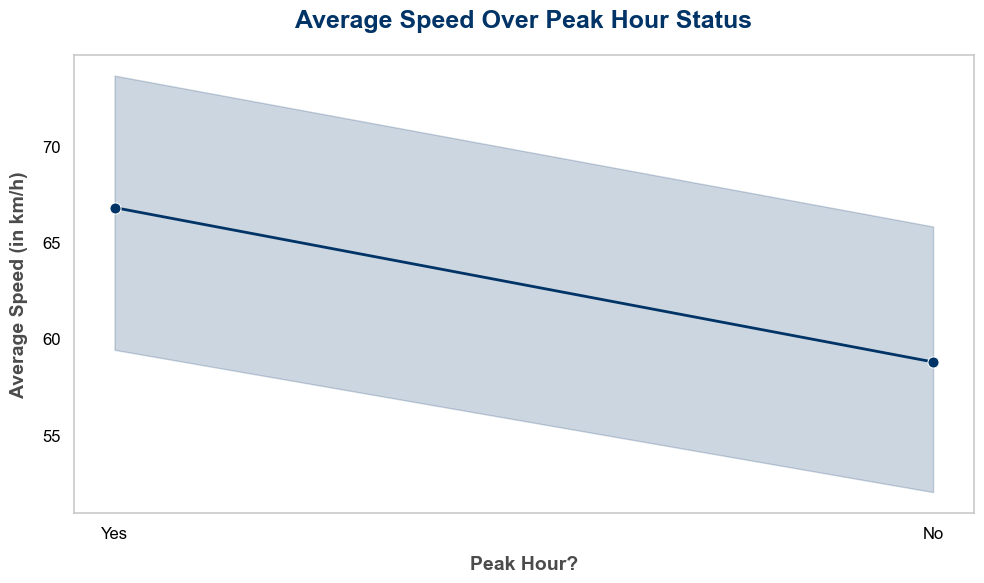

In [449]:
plot_color = '#003366'  # Navy blue
line_color = '#003366'  # Navy blue
title_color = '#4B4B4B'  # Dark gray
marker_color = '#003366'  # Navy blue

plt.figure(figsize=(10, 6))

sns.lineplot(x='Peak Hour?', y='Average Speed (in km/h)', data=df, color=line_color, linewidth=2, marker='o', markersize=8, markerfacecolor=marker_color)

plt.title('Average Speed Over Peak Hour Status', fontsize=18, color=plot_color, weight='bold', pad=20)
plt.xlabel('Peak Hour?', fontsize=14, color=title_color, weight='bold', labelpad=10)
plt.ylabel('Average Speed (in km/h)', fontsize=14, color=title_color, weight='bold', labelpad=10)

plt.xticks(rotation=0, fontsize=12, color='black', weight='medium')
plt.yticks(fontsize=12, color='black', weight='medium')

plt.grid(False)

plt.tight_layout()
plt.show()

**_Categorical Analysis of the Association Between Weather Condition and Accident Levels_**

+ __Statistical Analysis__

In [452]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Weather Condition'], df['Accident Level'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("CHI-SQUARE TEST OF INDEPENDENCE")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

if p_value < 0.05:
    print("Conclusion: Chi-Square Test indicates a significant association between weather conditions and accident levels.")
else:
    print("Conclusion: Chi-Square Test indicates no significant association between weather conditions and accident levels.")

CHI-SQUARE TEST OF INDEPENDENCE
Chi2 Statistic: 10.6099
P-value: 0.5626
Degrees of Freedom: 12
Conclusion: Chi-Square Test indicates no significant association between weather conditions and accident levels.


+ __Visualization__

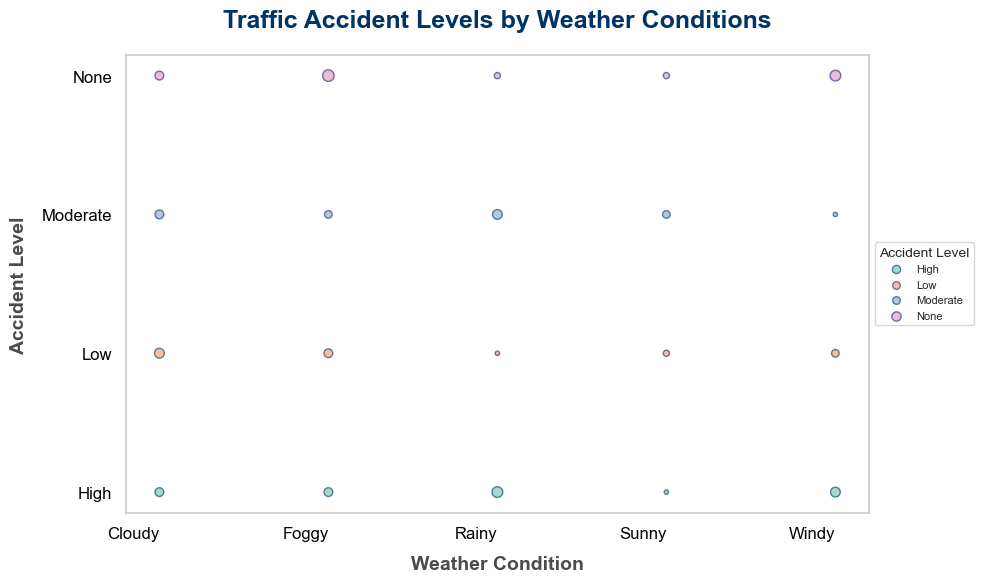

In [454]:
contingency_table = pd.crosstab(df['Weather Condition'], df['Accident Level'])

plt.figure(figsize=(10, 6))

base_color = '#003366'
bubble_colors = plt.get_cmap('Set2').colors

for i, level in enumerate(contingency_table.columns):
    plt.scatter(
        x=contingency_table.index,
        y=[level] * len(contingency_table.index),
        s=contingency_table[level] * 10,  # Bubble size proportional to count
        alpha=0.6,
        color=bubble_colors[i],  # Assign color from the Set2 colormap
        edgecolor=base_color,
        label=level
    )

plt.title('Traffic Accident Levels by Weather Conditions', fontsize=18, color=base_color, weight='bold', pad=20)
plt.xlabel('Weather Condition', fontsize=14, color='#4B4B4B', weight='bold', labelpad=10)
plt.ylabel('Accident Level', fontsize=14, color='#4B4B4B', weight='bold', labelpad=10)

plt.xticks(rotation=0, ha='right', fontsize=12, color='black', weight='medium')
plt.yticks(fontsize=12, color='black', weight='medium')

plt.legend(title='Accident Level', title_fontsize='10', fontsize='8', loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(False)

plt.tight_layout()
plt.show()

**_Categorical Analysis of the Association Between Temperature Levels and Accident Levels_**

+ __Statistical Analysis__

In [457]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Temperature Level'], df['Accident Level'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("CHI-SQUARE TEST OF INDEPENDENCE")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

if p_value < 0.05:
    print("Conclusion: Chi-Square Test indicates a significant association between temperature levels and accident levels.")
else:
    print("Conclusion: Chi-Square Test indicates no significant association between temperature levels and accident levels.")

CHI-SQUARE TEST OF INDEPENDENCE
Chi2 Statistic: 15.3395
P-value: 0.0178
Degrees of Freedom: 6
Conclusion: Chi-Square Test indicates a significant association between temperature levels and accident levels.


+ __Visualization__

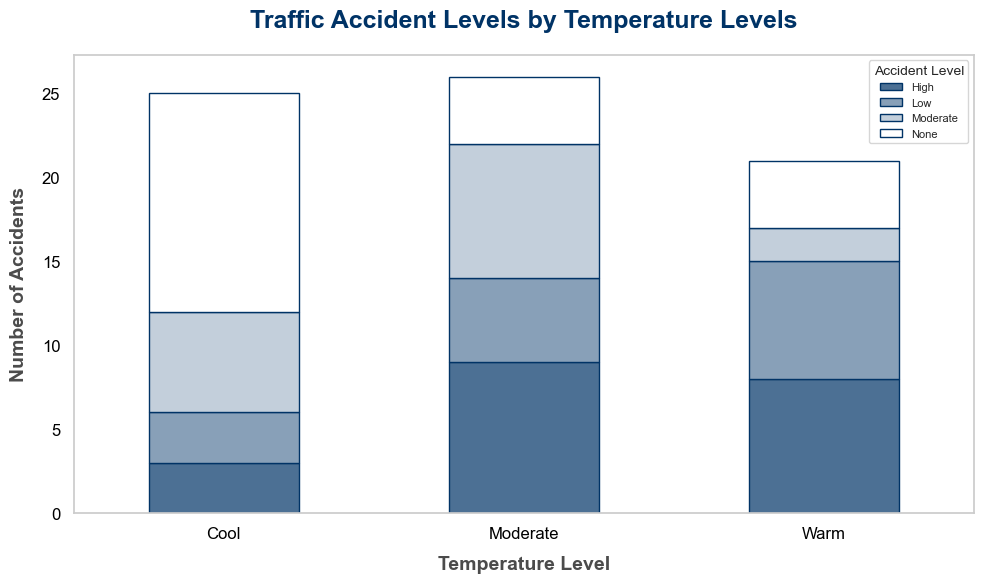

In [459]:
base_color = '#003366'

def generate_shades(color, num_shades):
    base_rgb = mcolors.hex2color(color)
    shades = []
    for i in range(num_shades):
        # Calculate a lighter shade
        lightness = 0.3 + 0.7 * i / (num_shades - 1)  # Range from 0.3 to 1
        shade_rgb = [base_rgb[0] + (1 - base_rgb[0]) * lightness,
                     base_rgb[1] + (1 - base_rgb[1]) * lightness,
                     base_rgb[2] + (1 - base_rgb[2]) * lightness]
        shades.append(mcolors.to_hex(shade_rgb))
    return shades

num_accident_levels = len(df['Accident Level'].unique())
bar_colors = generate_shades(base_color, num_accident_levels)

contingency_table = pd.crosstab(df['Temperature Level'], df['Accident Level'])

ax = contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=bar_colors, edgecolor='#003366')
plt.title('Traffic Accident Levels by Temperature Levels', fontsize=18, color='#003366', weight='bold', pad=20)
plt.xlabel('Temperature Level', fontsize=14, color='#4B4B4B', weight='bold', labelpad=10)
plt.ylabel('Number of Accidents', fontsize=14, color='#4B4B4B', weight='bold', labelpad=10)
plt.xticks(rotation=0, fontsize=12, color='black', weight='medium')
plt.yticks(fontsize=12, color='black', weight='medium')

plt.legend(title='Accident Level', title_fontsize='10', fontsize='8', loc='upper right')

plt.grid(False)

plt.tight_layout()
plt.show()

**_Categorical Analysis of the Association Between Visibility Levels and Accident Levels_**

+ __Statistical Analysis__

In [462]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Visibility Level'], df['Accident Level'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("CHI-SQUARE TEST OF INDEPENDENCE")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

if p_value < 0.05:
    print("Conclusion: Chi-Square Test indicates a significant association between visibility levels and accident levels.")
else:
    print("Conclusion: Chi-Square Test indicates no significant association between visibility levels and accident levels.")

CHI-SQUARE TEST OF INDEPENDENCE
Chi2 Statistic: 4.6936
P-value: 0.5837
Degrees of Freedom: 6
Conclusion: Chi-Square Test indicates no significant association between visibility levels and accident levels.


+ __Visualization__

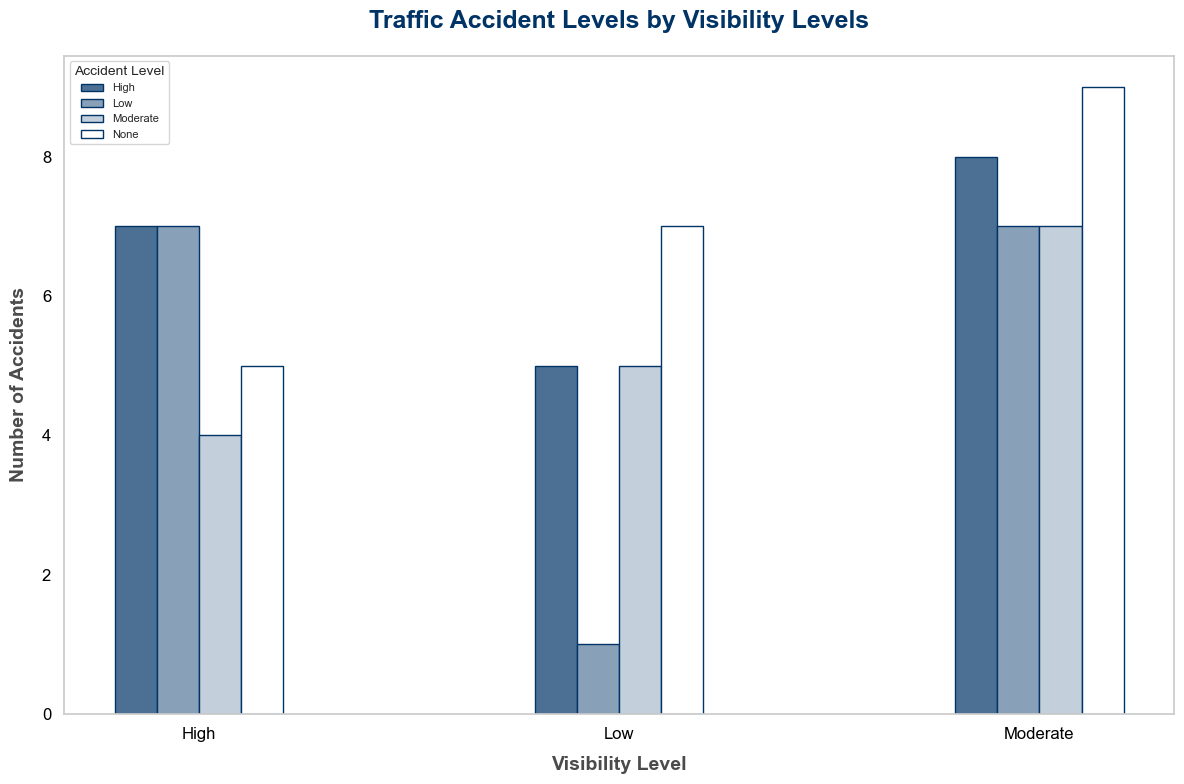

In [464]:
base_color = '#003366'

def generate_shades(color, num_shades):
    base_rgb = mcolors.hex2color(color)
    shades = []
    for i in range(num_shades):
        lightness = 0.3 + 0.7 * i / (num_shades - 1)  # Range from 0.3 to 1
        shade_rgb = [base_rgb[0] + (1 - base_rgb[0]) * lightness,
                     base_rgb[1] + (1 - base_rgb[1]) * lightness,
                     base_rgb[2] + (1 - base_rgb[2]) * lightness]
        shades.append(mcolors.to_hex(shade_rgb))
    return shades

num_accident_levels = len(df['Accident Level'].unique())
bar_colors = generate_shades(base_color, num_accident_levels)

contingency_table = pd.crosstab(df['Visibility Level'], df['Accident Level'])

fig, ax = plt.subplots(figsize=(12, 8))

width = 0.1
x = range(len(contingency_table.index))

for i, (accident_level, color) in enumerate(zip(contingency_table.columns, bar_colors)):
    ax.bar([p + width * i for p in x], contingency_table[accident_level], width=width, label=accident_level, color=color, edgecolor='#003366')

ax.set_title('Traffic Accident Levels by Visibility Levels', fontsize=18, color='#003366', weight='bold', pad=20)
ax.set_xlabel('Visibility Level', fontsize=14, color='#4B4B4B', weight='bold', labelpad=10)
ax.set_ylabel('Number of Accidents', fontsize=14, color='#4B4B4B', weight='bold', labelpad=10)
ax.set_xticks([p + width * (num_accident_levels / 2 - 0.5) for p in x])
ax.set_xticklabels(contingency_table.index, fontsize=12, color='black', fontweight='medium')
ax.tick_params(axis='y', labelsize=12, colors='black', labelcolor='black')

ax.legend(title='Accident Level', title_fontsize='10', fontsize='8', loc='upper left')

ax.grid(False)

plt.tight_layout()
plt.show()

**_Categorical Analysis of the Association Between Humidity Levels and Accident Levels_**

+ __Statistical Analysis__

In [467]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Humidity Level'], df['Accident Level'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("CHI-SQUARE TEST OF INDEPENDENCE")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

if p_value < 0.05:
    print("Conclusion: Chi-Square Test indicates a significant association between humidity levels and accident levels.")
else:
    print("Conclusion: Chi-Square Test indicates no significant association between humidity levels and accident levels.")

CHI-SQUARE TEST OF INDEPENDENCE
Chi2 Statistic: 21.2258
P-value: 0.0017
Degrees of Freedom: 6
Conclusion: Chi-Square Test indicates a significant association between humidity levels and accident levels.


+ __Visualization__

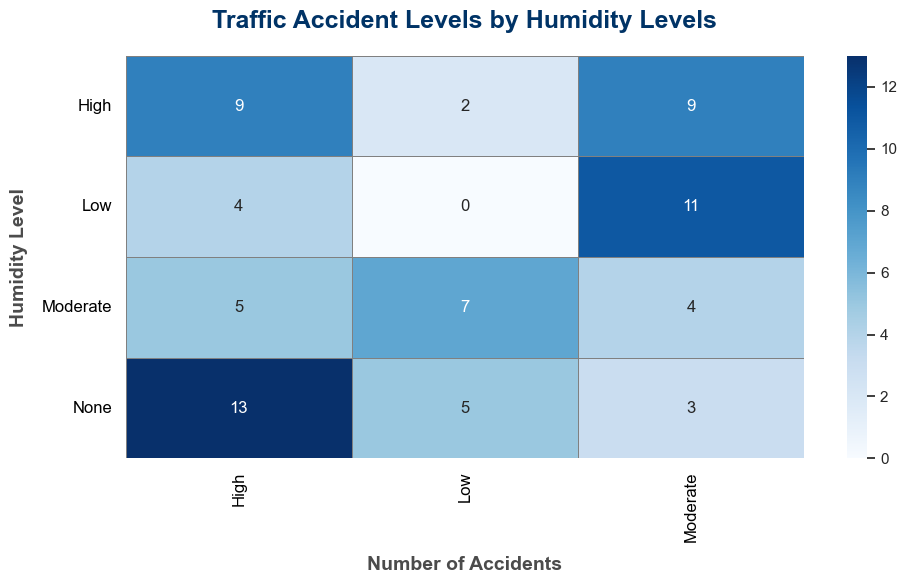

In [469]:
contingency_table = pd.crosstab(df['Accident Level'], df['Humidity Level'])

plot_color = '#003366'
title_color = '#4B4B4B'

plt.figure(figsize=(10, 6))

sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', linewidths=0.5, linecolor='gray')

plt.title('Traffic Accident Levels by Humidity Levels', fontsize=18, color=plot_color, weight='bold', pad=20)
plt.xlabel('Number of Accidents', fontsize=14, color=title_color, weight='bold', labelpad=10)
plt.ylabel('Humidity Level', fontsize=14, color=title_color, weight='bold', labelpad=10)

plt.xticks(rotation=90, fontsize=12, color='black', weight='medium')
plt.yticks(rotation=0, fontsize=12, color='black', weight='medium')

plt.tight_layout()
plt.show()

**_Categorical Analysis of the Association Between Wind Speed Levels and Accident Levels_**

+ __Statistical Analysis__

In [472]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Wind Speed Level'], df['Accident Level'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("CHI-SQUARE TEST OF INDEPENDENCE")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

if p_value < 0.05:
    print("Conclusion: Chi-Square Test indicates a significant association between wind speed levels and accident levels.")
else:
    print("Conclusion: Chi-Square Test indicates no significant association between wind speed levels and accident levels.")

CHI-SQUARE TEST OF INDEPENDENCE
Chi2 Statistic: 2.0847
P-value: 0.9117
Degrees of Freedom: 6
Conclusion: Chi-Square Test indicates no significant association between wind speed levels and accident levels.


+ __Visualization__

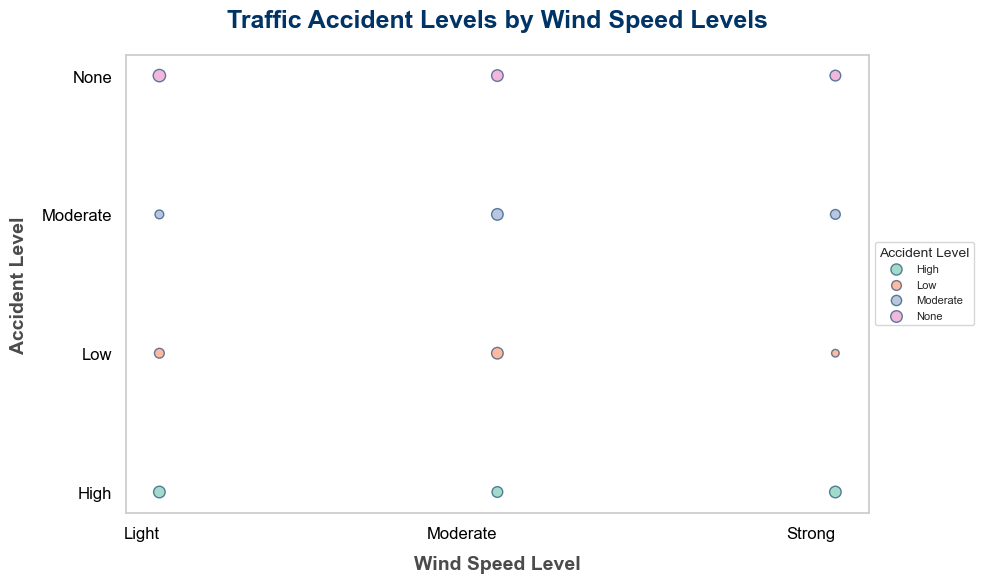

In [474]:
contingency_table = pd.crosstab(df['Wind Speed Level'], df['Accident Level'])

plt.figure(figsize=(10, 6))

base_color = '#003366'
bubble_colors = plt.get_cmap('Set2').colors

for i, level in enumerate(contingency_table.columns):
    plt.scatter(
        x=contingency_table.index,
        y=[level] * len(contingency_table.index),
        s=contingency_table[level] * 10,  # Bubble size proportional to count
        alpha=0.6,
        color=bubble_colors[i],  # Assign color from the Set2 colormap
        edgecolor=base_color,
        label=level
    )

plt.title('Traffic Accident Levels by Wind Speed Levels', fontsize=18, color=base_color, weight='bold', pad=20)
plt.xlabel('Wind Speed Level', fontsize=14, color='#4B4B4B', weight='bold', labelpad=10)
plt.ylabel('Accident Level', fontsize=14, color='#4B4B4B', weight='bold', labelpad=10)

plt.xticks(rotation=0, ha='right', fontsize=12, color='black', weight='medium')
plt.yticks(fontsize=12, color='black', weight='medium')

plt.legend(title='Accident Level', title_fontsize='10', fontsize='8', loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(False)

plt.tight_layout()
plt.show()

# THE END